# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

%matplotlib inline

In [4]:
df = pd.read_csv('b1abb33c4f.csv')
df

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [5]:
df['SEXO'] = df['SEXO'].replace({0: 'Ignorado', 1: 'Masculino', 2: 'Feminino'})
df['GESTACAO'] = df['GESTACAO'].replace({
    1: 'Menos de 22 semanas',
    2: '22 a 27 semanas',
    3: '28 a 31 semanas',
    4: '32 a 36 semanas',
    5: '37 a 41 semanas',
    6: '42 semanas ou mais',
    9: 'Ignorado'
})
df['ESTCIVMAE'] = df['ESTCIVMAE'].replace({
    1: 'Solteira',
    2: 'Casada',
    3: 'Viúva',
    4: 'Divorciada',
    5: 'União consensual',
    9: 'Ignorado'
})
df['CONSULTAS'] = df['CONSULTAS'].replace({
    1: '0',
    2: '1 a 3',
    3: '4 a 6',
    4: '7 ou mais',
    9: 'Ignorado'
})

In [6]:
colunas_interesse = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']
df2 = df[colunas_interesse].copy()
df2

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,União consensual,7 ou mais
1,8.0,9.0,Feminino,37 a 41 semanas,Casada,7 ou mais
2,8.0,10.0,Feminino,37 a 41 semanas,Ignorado,7 ou mais
3,9.0,10.0,Feminino,37 a 41 semanas,União consensual,4 a 6
4,8.0,10.0,Feminino,37 a 41 semanas,Casada,7 ou mais
...,...,...,...,...,...,...
27023,8.0,9.0,Masculino,32 a 36 semanas,Casada,7 ou mais
27024,8.0,9.0,Masculino,37 a 41 semanas,Solteira,7 ou mais
27025,9.0,10.0,Masculino,37 a 41 semanas,Casada,7 ou mais
27026,8.0,9.0,Masculino,32 a 36 semanas,Casada,7 ou mais


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

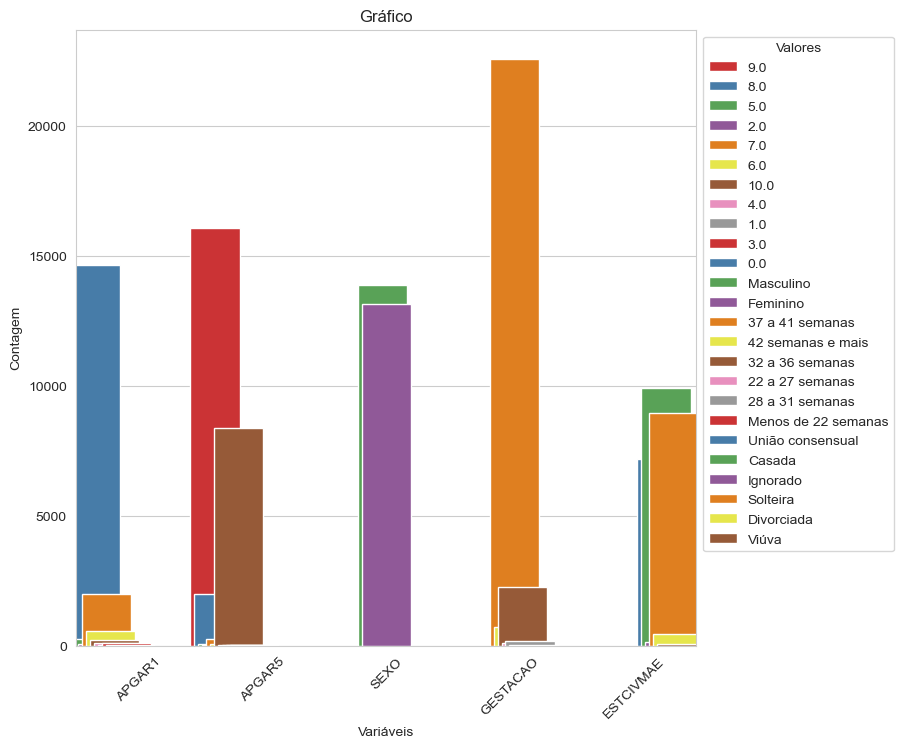

In [15]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 8))

ax = sns.countplot(x='variable', hue='value', data=pd.melt(df2[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]), palette='Set1')

plt.title('Gráfico')
plt.xlabel('Variáveis')
plt.ylabel('Contagem')

for patch in ax.patches:
    width = patch.get_width()
    patch.set_width(0.4)
    patch.set_x(patch.get_x() + (width - 0.4) / 2)

plt.legend(title='Valores', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)

plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

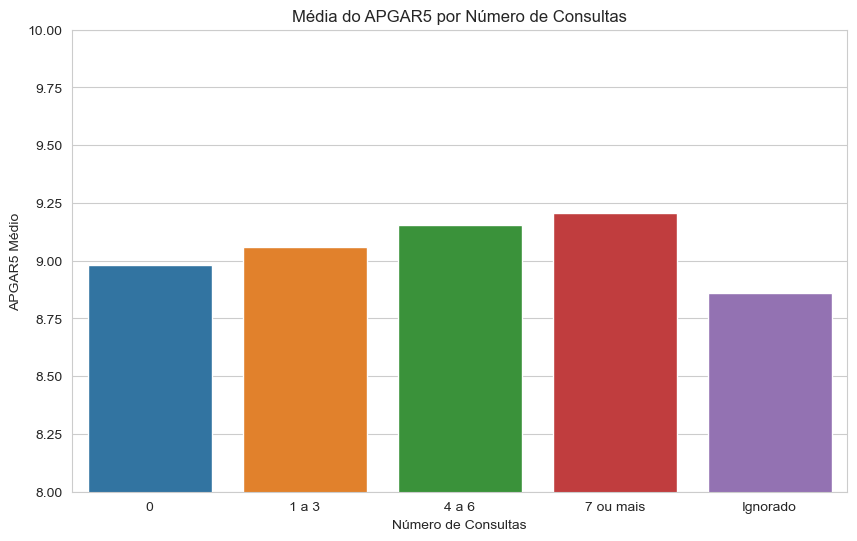

In [11]:
df_agrupado = df2.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

ordem_consultas = ['0', '1 a 3', '4 a 6', '7 ou mais', 'Ignorado']

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(x='CONSULTAS', y='APGAR5', data=df_agrupado, order=ordem_consultas)
plt.ylim(8, 10)
plt.xlabel('Número de Consultas')
plt.ylabel('APGAR5 Médio')
plt.title('Média do APGAR5 por Número de Consultas')
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

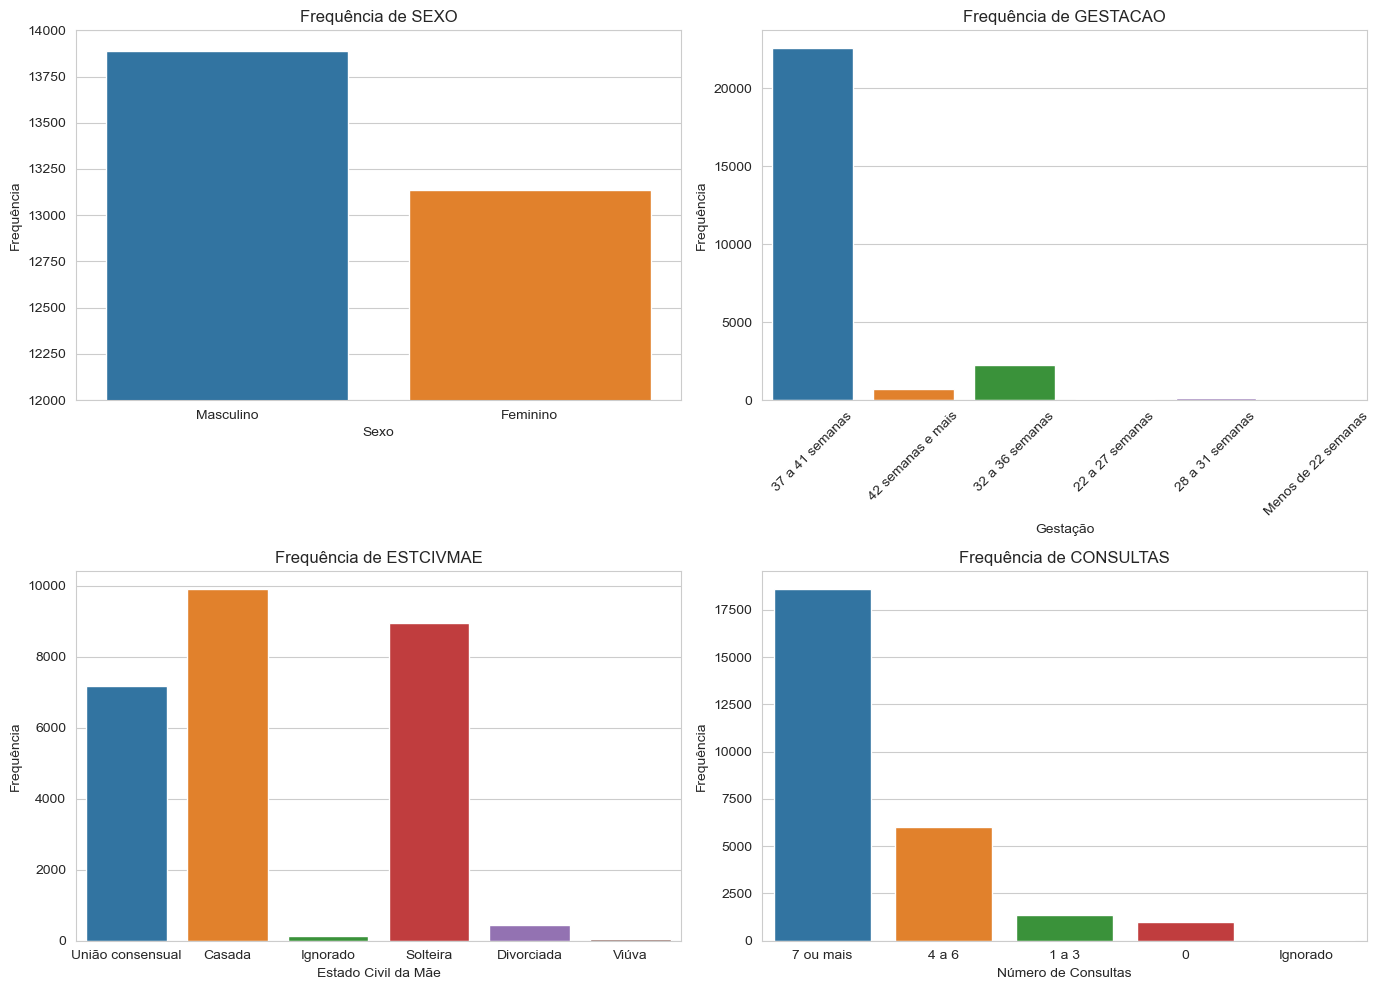

In [9]:
sns.set_style('whitegrid')

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='SEXO', data=df2)
plt.ylim(12000, 14000)
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.title('Frequência de SEXO')

plt.subplot(2, 2, 2)
sns.countplot(x='GESTACAO', data=df2)
plt.xticks(rotation=45)
plt.xlabel('Gestação')
plt.ylabel('Frequência')
plt.title('Frequência de GESTACAO')

plt.subplot(2, 2, 3)
sns.countplot(x='ESTCIVMAE', data=df2)
plt.xlabel('Estado Civil da Mãe')
plt.ylabel('Frequência')
plt.title('Frequência de ESTCIVMAE')

plt.subplot(2, 2, 4)
sns.countplot(x='CONSULTAS', data=df2)
plt.xlabel('Número de Consultas')
plt.ylabel('Frequência')
plt.title('Frequência de CONSULTAS')

plt.tight_layout()

plt.show()